In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

In [3]:
nnfs.init()

## A Single Neuron

In [4]:
inputs = [1,2,3,2.5]
weights = [0.2,0.8,-0.5,1.0]
bias = 2

print(inputs)
print(weights)
print(bias)

[1, 2, 3, 2.5]
[0.2, 0.8, -0.5, 1.0]
2


In [5]:
output = (inputs[0] * weights[0] +
          inputs[1] * weights[1] +
          inputs[2] * weights[2] +
          inputs[3] * weights[3] + bias)
output

4.8

## A Layer of Neurons

In [6]:
inputs = [1,2,3,2.5]

weights_1 = [0.2,0.8,-0.5,1.0]
weights_2 = [0.5,-0.91,0.26,-0.5]
weights_3 = [-0.26,-0.27,0.17,0.87]


bias_1 = 2
bias_2 = 3
bias_3 = 0.5

In [7]:
outputs = [
    # Neuron 1
    inputs[0] * weights_1[0] +
    inputs[1] * weights_1[1] +
    inputs[2] * weights_1[2] +
    inputs[3] * weights_1[3] + bias_1,
    
    # Neuron 2
    inputs[0] * weights_2[0] +
    inputs[1] * weights_2[1] +
    inputs[2] * weights_2[2] +
    inputs[3] * weights_2[3] + bias_2,
    
    # Neuron 3
    inputs[0] * weights_3[0] +
    inputs[1] * weights_3[1] +
    inputs[2] * weights_3[2] +
    inputs[3] * weights_3[3] + bias_3
]

outputs

[4.8, 1.21, 2.385]

In [8]:
inputs = [1,2,3,2.5]

weights = [[0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]]

biases = [2,3,0.5]

In [9]:
layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input * weight
    
    neuron_output += neuron_bias
    
    layer_outputs.append(neuron_output)
    
layer_outputs

[4.8, 1.21, 2.385]

## Tensors, Arrays and Vectors 

In [10]:
l = [1,5,6,2]
lol = [[1,5,6,2],
      [3,2,1,3]]
lolol = [[[1,5,6,2],
          [3,2,1,3]],
         [[5,2,1,2],
          [6,4,8,4]],
         [[2,8,5,3],
          [1,1,9,4]]]

lolol

[[[1, 5, 6, 2], [3, 2, 1, 3]],
 [[5, 2, 1, 2], [6, 4, 8, 4]],
 [[2, 8, 5, 3], [1, 1, 9, 4]]]

In [11]:
another_list_of_lists = [[4,2,3], [5,1]]

In [12]:
list_matrix_array = [[4,2], [5,1],[8,2]]

## Dot Product and Vector Addition

In [13]:
a = [1,2,3]
b = [2,3,4]

In [14]:
dot_product = a[0]*b[0] + a[1]*b[1] + a[2]*b[2]
dot_product

20

## A Single Neuron with NumPy

In [15]:
inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([0.2, 0.8, -0.5, 1.0])
bias = 2.0

outputs = np.dot(weights, inputs) + bias
outputs

4.799999952316284

## A Layer of Neurons with NumPy

In [16]:
inputs = np.array([1,2,3,2.5])

weights = np.array([[0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]])

biases = np.array([2,3,0.5])

In [17]:
layer_outputs = np.dot(weights, inputs) + biases
layer_outputs

array([4.79999995, 1.21000004, 2.38499999])

In [18]:
layer_outputs = np.dot(inputs, weights) + biases
layer_outputs

ValueError: shapes (4,) and (3,4) not aligned: 4 (dim 0) != 3 (dim 0)

In [19]:
layer_outputs = np.dot(inputs, np.array(weights).T) + biases
layer_outputs

array([4.79999995, 1.21000004, 2.38499999])

## Transposition of the Matrix Product

In [20]:
a = [1,2,3]
b = [2,3,4]

a = np.array([a])
b = np.array([b])

print(np.dot(a,b.T))

[[20.]]


## A Layer of Neurons & Batch of Data w/ NumPy

In [21]:
inputs = np.array([[1.0,2.0,3.0,2.5],
          [2.0,5.0,-1.0,2.0],
          [-1.5,2.7,-0.5,-0.8]])

weights = [[0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]]

biases = [2,3,0.5]

outputs = np.dot(inputs, np.array(weights).T) + biases
outputs

array([[ 4.79999995,  1.21000004,  2.38499999],
       [ 8.9000001 , -1.80999994,  0.19999999],
       [ 3.30999994,  0.06299996, -0.62      ]])

# CH3: Adding Layers

In [22]:
inputs = np.array([[1.0,2.0,3.0,2.5],
                   [2.0,5.0,-1.0,2.0],
                   [-1.5,2.7,-0.5,-0.8]])

weights_1 = np.array([[0.2,0.8,-0.5,1.0],
                      [0.5,-0.91,0.26,-0.5],
                      [-0.26,-0.27,0.17,0.87]])

biases_1 = np.array([2,3,0.5])

In [23]:
weights_2 = np.array([[0.1,-0.14,0.5],
                      [-0.5,0.12,-0.33],
                      [-0.44,0.73,-0.13]])

biases_2 = np.array([-1,2,-0.5])

In [24]:
layer_1_out = np.dot(inputs, weights_1.T) + biases_1
layer_1_out

array([[ 4.79999995,  1.21000004,  2.38499999],
       [ 8.9000001 , -1.80999994,  0.19999999],
       [ 3.30999994,  0.06299996, -0.62      ]])

In [25]:
layer_2_out = np.dot(layer_1_out, weights_2.T) + biases_2
layer_2_out

array([[ 0.50310004, -1.04184985, -2.03874993],
       [ 0.24339998, -2.73320007, -5.76329994],
       [-0.98782   ,  0.55716002, -1.82981002]])

## Training Data

In [26]:
X,y = spiral_data(samples=100,classes=3)

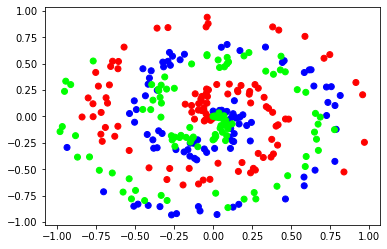

In [27]:
plt.scatter(X[:,0],X[:,1], c=y, cmap='brg')
plt.show()

In [28]:
y.shape

(300,)

In [29]:
X.shape

(300, 2)

## Dense Layer Class

In [29]:
from layer_dense import Layer_Dense

In [31]:
dense1 = Layer_Dense(2,3)

In [32]:
dense1.forward(X)

In [33]:
dense1.output[:5]

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 2.6901334e-04,  1.9214292e-04, -6.4955508e-05],
       [ 5.7597383e-04,  3.4218933e-04, -2.6021326e-05],
       [ 6.2844809e-04,  2.0301706e-04,  2.4990441e-04],
       [ 9.0252922e-04,  3.3152275e-04,  2.9360273e-04]], dtype=float32)

In [34]:
dense1.output[:5].shape

(5, 3)

In [35]:
dense1.output.shape

(300, 3)

# CH 4: Activation Functions

In [36]:
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output = []

for i in inputs:
    if i > 0:
        output.append(i)
    else:
        output.append(0)

output

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [37]:
output = []
for i in inputs:
    output.append(max(0,i))
output

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [38]:
output = []
for i in inputs:
    output.append(np.maximum(0,i))
output

[0, 2, 0, 3.3, 0.0, 1.1, 2.2, 0]

In [28]:
from activations import ReLU

In [40]:
activation1 = ReLU()

In [41]:
dense1.output.shape

(300, 3)

In [42]:
activation1.forward(dense1.output)

In [43]:
activation1.output.shape

(300, 3)

In [44]:
activation1.output[:5]

array([[0.        , 0.        , 0.        ],
       [0.00026901, 0.00019214, 0.        ],
       [0.00057597, 0.00034219, 0.        ],
       [0.00062845, 0.00020302, 0.0002499 ],
       [0.00090253, 0.00033152, 0.0002936 ]], dtype=float32)

In [45]:
layer_outputs = [4.8, 1.21, 2.385]
exp_values  = []

for output in layer_outputs:
    exp_values.append(np.e ** output)
    
print(layer_outputs)
print(exp_values)

[4.8, 1.21, 2.385]
[121.51041751873483, 3.353484652549023, 10.859062664920513]


In [46]:
norm_base = sum(exp_values)
norm_values = []
for value in exp_values:
    norm_values.append(value/norm_base)

norm_values

[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]

In [47]:
sum(norm_values)

0.9999999999999999

In [48]:
exp_values = np.exp(layer_outputs)
exp_values

array([121.51041752,   3.35348465,  10.85906266])

In [49]:
norm_values = exp_values/np.sum(exp_values)
norm_values

array([0.89528266, 0.02470831, 0.08000903])

In [50]:
norm_values.sum()

0.9999999999999999

In [57]:
np.sum(exp_values).shape

()

In [27]:
from activations import SoftMax

In [59]:
softmax = SoftMax()
softmax.forward([[1,2,3]])
softmax.output

array([[0.09003057, 0.24472847, 0.66524096]])

In [60]:
softmax.forward([[-2,-1,0]])
softmax.output

array([[0.09003057, 0.24472847, 0.66524096]])

In [61]:
i = [[1,2,3]]
np.max(i, axis=1, keepdims=True).shape

(1, 1)

In [62]:
np.max(i, axis=1, keepdims=False).shape

(1,)

In [63]:
X,y = spiral_data(samples=100,classes=3)

dense1 = Layer_Dense(2,3)
activation1 = ReLU()

dense2 = Layer_Dense(3,3)
activation2 = SoftMax()

In [64]:
dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])
print(activation2.output.shape)

[[0.33333334 0.33333334 0.33333334]
 [0.3333334  0.3333334  0.33333316]
 [0.33333352 0.3333335  0.333333  ]
 [0.3333336  0.33333358 0.33333278]
 [0.33333373 0.33333364 0.3333326 ]]
(300, 3)


# CH 5: Calculating Network Error with Loss

## Categorical Cross-Entropy

In [4]:
import math

In [5]:
softmax_output = [0.7,0.1,0.2]
target_output =[1.,0,0]

loss = -(math.log(softmax_output[0]) * target_output[0] +
         math.log(softmax_output[1]) * target_output[1] + 
         math.log(softmax_output[2]) * target_output[2])
loss

0.35667494393873245

In [6]:
loss = -math.log(softmax_output[0])
loss

0.35667494393873245

In [7]:
softmax_output = np.array([[0.7,0.1,0.2],
                           [0.1,0.5,0.4],
                           [0.02, 0.9, 0.08]])

class_targets = np.array([0,1,1])

In [8]:
for targ_idx, dist in zip(class_targets, softmax_output):
    print(dist[targ_idx])

0.7
0.5
0.9


In [9]:
print(softmax_output[[0,1,2],class_targets])

[0.7 0.5 0.9]


In [10]:
print(softmax_output[range(len(softmax_output)), class_targets])

[0.7 0.5 0.9]


In [11]:
print(-np.log(softmax_output[range(len(softmax_output)), class_targets]))

[0.35667494 0.69314718 0.10536052]


In [12]:
neg_log = -np.log(softmax_output[range(len(softmax_output)), class_targets])
neg_log

array([0.35667494, 0.69314718, 0.10536052])

In [13]:
average_loss = np.mean(neg_log)
average_loss

0.38506088005216804

In [14]:
softmax_output = np.array([[0.7,0.1,0.2],
                           [0.1,0.5,0.4],
                           [0.02, 0.9, 0.08]])

class_targets = np.array([[1,0,0],
                          [0,1,0],
                          [0,1,0]])

In [15]:
if len(class_targets.shape) == 1:
    correct_confidences = softmax_output[range(len(softmax_output)), class_targets]
    print(correct_confidences)
elif len(class_targets.shape) == 2:
    correct_confidences = np.sum(softmax_output*class_targets, axis=1)
    print(correct_confidences)

[0.7 0.5 0.9]


In [16]:
neg_log = -np.log(correct_confidences)
neg_log

array([0.35667494, 0.69314718, 0.10536052])

In [17]:
average_loss = np.mean(neg_log)
average_loss

0.38506088005216804

In [18]:
np.log(0)

<ipython-input-18-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [19]:
-np.log(1)

-0.0

In [20]:
1e-3

0.001

In [21]:
-np.log(1 + 1e-7)

-9.999999505838704e-08

In [22]:
np.clip([0,1,0.5], 1e-7, 1 - 1e-7)

array([1.000000e-07, 9.999999e-01, 5.000000e-01])

In [23]:
from loss import Loss_CategoricalCrossEntropy

In [24]:
criterion = Loss_CategoricalCrossEntropy()

In [25]:
loss = criterion.calculate(softmax_output, class_targets)
loss

0.38506088005216804

In [30]:
X,y = spiral_data(samples=100,classes=3)

dense1 = Layer_Dense(2,3)
activation1 = ReLU()

dense2 = Layer_Dense(3,3)
activation2 = SoftMax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])
print(activation2.output.shape)
print(y.shape)

loss = criterion.calculate(activation2.output, y)
loss

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
(300, 3)
(300,)


1.0986104

## Accuracy Calculation

In [31]:
softmax_output = np.array([[0.7,0.2,0.1],
                           [0.5,0.1,0.4],
                           [0.02, 0.9, 0.08]])


class_targets = np.array([[1,0,0],
                          [0,1,0],
                          [0,1,0]])

class_targets = np.array([0,1,1])
class_targets

array([0, 1, 1])

In [32]:
predictions = np.argmax(softmax_output, axis=1)
predictions

array([0, 0, 1], dtype=int64)

In [33]:
if len(class_targets.shape) == 2:
    class_targets = np.argmax(class_targets, axis=1)
class_targets

array([0, 1, 1])

In [34]:
accuracy = (predictions==class_targets)
accuracy

array([ True, False,  True])

In [35]:
accuracy = np.mean(accuracy)
accuracy

0.6666666666666666

In [36]:
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)

accuracy = np.mean(predictions==y)
accuracy

0.34

# CH 6: Introducing Optimization


In [37]:
from nnfs.datasets import vertical_data

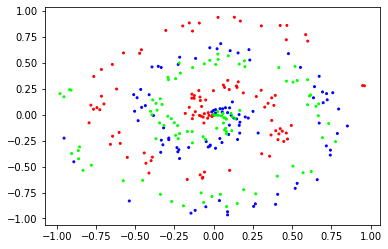

In [45]:
X, y= spiral_data(samples=100, classes=3)
plt.scatter(X[:,0],X[:,1], c=y, s=4, cmap='brg')
plt.show()

In [46]:
dense1 = Layer_Dense(2,3)
activation1 = ReLU()

dense2 = Layer_Dense(3,3)
activation2 = SoftMax()

criterion = Loss_CategoricalCrossEntropy()

In [47]:
lowest_loss = 999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [48]:
for iteration in range(10000):
    dense1.weights += 0.05 * np.random.randn(2,3)
    dense1.biases  += 0.05 * np.random.randn(1,3)
    
    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases +=  0.05 * np.random.randn(1,3)
    
    dense1.forward(X)
    activation1.forward(dense1.output)

    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = criterion.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    if loss < lowest_loss:
        print("New set of weights found, iteration:", iteration, "loss:", loss, "acc:", accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()
    
    

New set of weights found, iteration: 0 loss: 1.1009907 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0996505 acc: 0.3333333333333333
New set of weights found, iteration: 11 loss: 1.0986837 acc: 0.3333333333333333
New set of weights found, iteration: 19 loss: 1.0984364 acc: 0.3333333333333333
New set of weights found, iteration: 23 loss: 1.0980651 acc: 0.3333333333333333
New set of weights found, iteration: 29 loss: 1.097797 acc: 0.39666666666666667
New set of weights found, iteration: 36 loss: 1.0977947 acc: 0.3333333333333333
New set of weights found, iteration: 40 loss: 1.09763 acc: 0.3333333333333333
New set of weights found, iteration: 42 loss: 1.0963076 acc: 0.38666666666666666
New set of weights found, iteration: 45 loss: 1.0963029 acc: 0.36666666666666664
New set of weights found, iteration: 48 loss: 1.0960826 acc: 0.36666666666666664
New set of weights found, iteration: 49 loss: 1.0954475 acc: 0.3566666666666667
New set of weights found, iteration: 50 l